In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pgmpy
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 1.9 MB 6.3 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
covid_policies_df = pd.read_csv(
    "../Final_Data_Combined.csv", index_col=0
)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 17)


,Country,Date,school_closures,workplace_closures,cancel_public_events,restrict_public_gathering,closure_public_transport,SHN_requirement,restriction_internal_movement,internation_travel_control,PI_Campaign,testing_policy,contact_tracing,Facial_Covering,Vaccine_policy,Confirmed_cases,Confirmed_Deathes
0,China,2020-05-02,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
1,China,2020-05-03,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
2,China,2020-05-04,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
3,China,2020-05-05,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
4,China,2020-05-06,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0


In [4]:
covid_policies_df["date"] = pd.to_datetime(covid_policies_df["Date"])
covid_policies_df["Country"] = covid_policies_df["Country"].str.lower()
covid_policies_df["Country"] = covid_policies_df["Country"].str.replace(" ", "_")
covid_policies_df.rename(columns={"Country": "country"}, inplace=True)
covid_policies_df.set_index(["country", "date"], inplace=True)
covid_policies_df.drop(columns=["Date"], inplace=True)
covid_policies_df.rename(
    columns={col: col.lower() for col in covid_policies_df.columns}, inplace=True
)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 15)


school_closures workplace_closures cancel_public_events  \
country date                                                                 
china   2020-05-02              2G                 1G                   1G   
        2020-05-03              2G                 1G                   1G   
        2020-05-04              2G                 1G                   1G   
        2020-05-05              2G                 1G                   1G   
        2020-05-06              2G                 1G                   1G   

                   restrict_public_gathering closure_public_transport  \
country date                                                            
china   2020-05-02                        3G                        0   
        2020-05-03                        3G                        0   
        2020-05-04                        3G                        0   
        2020-05-05                        3G                        0   
        2020-05-06                        3G                        0   

                   shn_requirement restriction_internal_movement  \
country date                                                       
china   2020-05-02               0                            1G   
        2020-05-03               0                            1G   
        2020-05-04               0                            1G   
        2020-05-05               0                            1G   
        2020-05-06               0                            1G   

                    internation_travel_control pi_campaign  testing_policy  \
country date                                                                 
china   2020-05-02                         4.0          2G             3.0   
        2020-05-03                         4.0          2G             3.0   
        2020-05-04                         4.0          2G             3.0   
        2020-05-05                         4.0          2G             3.0   
        2020-05-06                         4.0          2G             3.0   

                    contact_tracing facial_covering vaccine_policy  \
country date                                                         
china   2020-05-02              2.0              2G              0   
        2020-05-03              2.0              2G              0   
        2020-05-04              2.0              2G              0   
        2020-05-05              2.0              2G              0   
        2020-05-06              2.0              2G              0   

                    confirmed_cases  confirmed_deathes  
country date                                            
china   2020-05-02            991.0                6.0  
        2020-05-03            991.0                6.0  
        2020-05-04            991.0                6.0  
        2020-05-05            991.0                6.0  
        2020-05-06            991.0                6.0

In [5]:
for column in covid_policies_df.columns:
    if pd.api.types.is_numeric_dtype(covid_policies_df[column].dtype):
        continue

    covid_policies_df[column] = (
        covid_policies_df[column].apply(lambda v: v[:1]).astype("int16")
    )

display(covid_policies_df.info())
covid_policies_df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23860 entries, ('china', Timestamp('2020-05-02 00:00:00')) to ('singapore', Timestamp('2022-02-27 00:00:00'))
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   school_closures                23860 non-null  int16  
 1   workplace_closures             23860 non-null  int16  
 2   cancel_public_events           23860 non-null  int16  
 3   restrict_public_gathering      23860 non-null  int16  
 4   closure_public_transport       23860 non-null  int16  
 5   shn_requirement                23860 non-null  int16  
 6   restriction_internal_movement  23860 non-null  int16  
 7   internation_travel_control     23860 non-null  float64
 8   pi_campaign                    23860 non-null  int16  
 9   testing_policy                 23860 non-null  float64
 10  contact_tracing                23860 non-null  float64
 11  facial_covering       

None

school_closures  workplace_closures  cancel_public_events  \
country date                                                                    
china   2020-05-02                2                   1                     1   
        2020-05-03                2                   1                     1   
        2020-05-04                2                   1                     1   
        2020-05-05                2                   1                     1   
        2020-05-06                2                   1                     1   

                    restrict_public_gathering  closure_public_transport  \
country date                                                              
china   2020-05-02                          3                         0   
        2020-05-03                          3                         0   
        2020-05-04                          3                         0   
        2020-05-05                          3                         0   
        2020-05-06                          3                         0   

                    shn_requirement  restriction_internal_movement  \
country date                                                         
china   2020-05-02                0                              1   
        2020-05-03                0                              1   
        2020-05-04                0                              1   
        2020-05-05                0                              1   
        2020-05-06                0                              1   

                    internation_travel_control  pi_campaign  testing_policy  \
country date                                                                  
china   2020-05-02                         4.0            2             3.0   
        2020-05-03                         4.0            2             3.0   
        2020-05-04                         4.0            2             3.0   
        2020-05-05                         4.0            2             3.0   
        2020-05-06                         4.0            2             3.0   

                    contact_tracing  facial_covering  vaccine_policy  \
country date                                                           
china   2020-05-02              2.0                2               0   
        2020-05-03              2.0                2               0   
        2020-05-04              2.0                2               0   
        2020-05-05              2.0                2               0   
        2020-05-06              2.0                2               0   

                    confirmed_cases  confirmed_deathes  
country date                                            
china   2020-05-02            991.0                6.0  
        2020-05-03            991.0                6.0  
        2020-05-04            991.0                6.0  
        2020-05-05            991.0                6.0  
        2020-05-06            991.0                6.0

In [6]:
country_to_population_map = {
    "hong_kong": 7500000,
    "china": 1448000000,
    "indonesia": 272000000,
    "singapore": 5450000,
    "malaysia": 32000000,
}

In [7]:
def compute_cases_bin(cases_per_mil):
    computed_bin = None
    if cases_per_mil <= 10000:
        computed_bin = 0
    elif cases_per_mil < 30000:
        computed_bin = 1
    elif cases_per_mil < 50000:
        computed_bin = 2
    elif cases_per_mil < 70000:
        computed_bin = 3
    elif cases_per_mil < 100000:
        computed_bin = 4
    elif cases_per_mil < 120000:
        computed_bin = 5
    else:
        computed_bin = 6

    return computed_bin

covid_policies_df["cases_per_mil"] = covid_policies_df.apply(lambda row: (row.confirmed_cases * 1000000)/ country_to_population_map[row.name[0]], axis=1)
covid_policies_df["cases_per_mil_cat"] = covid_policies_df["cases_per_mil"].apply(compute_cases_bin)
print(covid_policies_df.shape)

(23860, 17)


In [8]:
covid_policies_df = covid_policies_df.reset_index()

In [9]:
covid_policies_df.head()

,country,date,school_closures,workplace_closures,cancel_public_events,restrict_public_gathering,closure_public_transport,shn_requirement,restriction_internal_movement,internation_travel_control,pi_campaign,testing_policy,contact_tracing,facial_covering,vaccine_policy,confirmed_cases,confirmed_deathes,cases_per_mil,cases_per_mil_cat
0,china,2020-05-02,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
1,china,2020-05-03,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
2,china,2020-05-04,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
3,china,2020-05-05,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
4,china,2020-05-06,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0


In [10]:
for c in covid_policies_df.country.unique():
    exec(f"df_{c} = covid_policies_df[covid_policies_df.country == \"{c}\"]")
    eval(f"print(\"Size of df_{c}\",df_{c}.shape)")

Size of df_china (21199, 19)
Size of df_hong_kong (666, 19)
Size of df_indonesia (667, 19)
Size of df_malaysia (661, 19)
Size of df_singapore (667, 19)


In [11]:
df_china.columns = [f"{col}_China" for col in df_china.columns]
df_malaysia.columns = [f"{col}_Malaysia" for col in df_malaysia.columns]
df_indonesia.columns = [f"{col}_Indonesia" for col in df_indonesia.columns]
df_singapore.columns = [f"{col}_Singapore" for col in df_singapore.columns]
df_hong_kong.columns = [f"{col}_Hong_Kong" for col in df_hong_kong.columns]

In [12]:
# removing duplicate rows for same date (take max restriction for the specific date)
df_china = df_china.groupby("date_China").max().reset_index()

In [13]:
m1 = pd.merge(df_china, df_indonesia, left_on = "date_China", right_on = "date_Indonesia")
print(m1.shape)

(667, 38)


In [14]:
m2 = pd.merge(m1, df_malaysia, left_on = "date_Indonesia", right_on = "date_Malaysia")
print(m2.shape)

(661, 57)


In [15]:
m3 = pd.merge(m2, df_singapore, left_on = "date_Indonesia", right_on = "date_Singapore")
print(m3.shape)

(661, 76)


In [16]:
m4 = pd.merge(m3, df_hong_kong, left_on = "date_Indonesia", right_on = "date_Hong_Kong")
print(m4.shape)

(660, 95)


In [17]:
m4.columns

Index(['date_China', 'country_China', 'school_closures_China',
       'workplace_closures_China', 'cancel_public_events_China',
       'restrict_public_gathering_China', 'closure_public_transport_China',
       'shn_requirement_China', 'restriction_internal_movement_China',
       'internation_travel_control_China', 'pi_campaign_China',
       'testing_policy_China', 'contact_tracing_China',
       'facial_covering_China', 'vaccine_policy_China',
       'confirmed_cases_China', 'confirmed_deathes_China',
       'cases_per_mil_China', 'cases_per_mil_cat_China', 'country_Indonesia',
       'date_Indonesia', 'school_closures_Indonesia',
       'workplace_closures_Indonesia', 'cancel_public_events_Indonesia',
       'restrict_public_gathering_Indonesia',
       'closure_public_transport_Indonesia', 'shn_requirement_Indonesia',
       'restriction_internal_movement_Indonesia',
       'internation_travel_control_Indonesia', 'pi_campaign_Indonesia',
       'testing_policy_Indonesia', 'contact

In [18]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [25]:
m4.rename(columns={"date_China": "date"}, inplace=True)

In [26]:
new_df = m4.drop(["country_Indonesia", "country_Malaysia", "country_Singapore", "country_China", "country_Hong_Kong",\
                 "date_Indonesia", "date_Malaysia", "date_Singapore", "date_Hong_Kong", \
                  'confirmed_cases_China', 'confirmed_deathes_China',\
                  'confirmed_cases_Indonesia', 'confirmed_deathes_Indonesia',\
                  'confirmed_cases_Malaysia', 'confirmed_deathes_Malaysia',\
                  'confirmed_cases_Singapore', 'confirmed_deathes_Singapore',\
                 'confirmed_cases_Hong_Kong', 'confirmed_deathes_Hong_Kong', \
                 'cases_per_mil_China', 'cases_per_mil_Indonesia', 'cases_per_mil_Malaysia', 'cases_per_mil_Singapore', 'cases_per_mil_Hong_Kong']\
                 , axis = 1)

In [28]:
print(new_df.shape)
new_df.head()

(660, 71)


,date,school_closures_China,workplace_closures_China,cancel_public_events_China,restrict_public_gathering_China,closure_public_transport_China,shn_requirement_China,restriction_internal_movement_China,internation_travel_control_China,pi_campaign_China,...,closure_public_transport_Hong_Kong,shn_requirement_Hong_Kong,restriction_internal_movement_Hong_Kong,internation_travel_control_Hong_Kong,pi_campaign_Hong_Kong,testing_policy_Hong_Kong,contact_tracing_Hong_Kong,facial_covering_Hong_Kong,vaccine_policy_Hong_Kong,cases_per_mil_cat_Hong_Kong
0,2020-05-02,3,3,2,4,1,3,2,4.0,2,...,0,1,0,4.0,2,2.0,2.0,1,0,0
1,2020-05-03,3,3,2,4,1,3,2,4.0,2,...,0,1,0,4.0,2,2.0,2.0,1,0,0
2,2020-05-04,3,3,2,4,1,3,2,4.0,2,...,0,1,0,4.0,2,2.0,2.0,1,0,0
3,2020-05-05,3,3,2,4,1,3,2,4.0,2,...,0,1,0,4.0,2,2.0,2.0,1,0,0
4,2020-05-06,3,3,2,4,1,3,2,4.0,2,...,0,1,0,4.0,2,2.0,2.0,1,0,0


In [36]:
shifted_cases_per_mil_df = new_df.filter(regex="^cases_per_mil").shift(periods=-10)
#According to the CDC, if you have mild to moderate COVID-19, you may be contagious for 10 days from the first day you noticed symptoms
# so the case count observed today would depend on the policies implemented 10 days prior => shift = -10

In [39]:
new_df.drop(shifted_cases_per_mil_df.columns, axis = 1, inplace=True)

In [41]:
shifted_new_df = pd.concat([new_df, shifted_cases_per_mil_df], axis = 1)

In [43]:
shifted_new_df.dropna(inplace=True)

In [46]:
shifted_new_df

,date,school_closures_China,workplace_closures_China,cancel_public_events_China,restrict_public_gathering_China,closure_public_transport_China,shn_requirement_China,restriction_internal_movement_China,internation_travel_control_China,pi_campaign_China,...,pi_campaign_Hong_Kong,testing_policy_Hong_Kong,contact_tracing_Hong_Kong,facial_covering_Hong_Kong,vaccine_policy_Hong_Kong,cases_per_mil_cat_China,cases_per_mil_cat_Indonesia,cases_per_mil_cat_Malaysia,cases_per_mil_cat_Singapore,cases_per_mil_cat_Hong_Kong
0,2020-05-02,3,3,2,4,1,3,2,4.0,2,...,2,2.0,2.0,1,0,0.0,0.0,0.0,0.0,0.0
1,2020-05-03,3,3,2,4,1,3,2,4.0,2,...,2,2.0,2.0,1,0,0.0,0.0,0.0,0.0,0.0
2,2020-05-04,3,3,2,4,1,3,2,4.0,2,...,2,2.0,2.0,1,0,0.0,0.0,0.0,0.0,0.0
3,2020-05-05,3,3,2,4,1,3,2,4.0,2,...,2,2.0,2.0,1,0,0.0,0.0,0.0,0.0,0.0
4,2020-05-06,3,3,2,4,1,3,2,4.0,2,...,2,2.0,2.0,1,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2022-02-07,3,3,2,4,2,3,2,3.0,2,...,2,3.0,2.0,3,5,0.0,1.0,4.0,4.0,0.0
646,2022-02-08,3,3,2,4,2,3,2,3.0,2,...,2,3.0,2.0,3,5,0.0,1.0,4.0,5.0,0.0
647,2022-02-09,3,3,2,4,2,3,2,3.0,2,...,2,3.0,2.0,3,5,0.0,1.0,4.0,5.0,0.0
648,2022-02-10,3,3,2,4,2,3,2,3.0,2,...,2,3.0,2.0,3,5,0.0,1.0,5.0,5.0,0.0


In [47]:
x_cols = list(set(shifted_new_df.columns) - \
set(["cases_per_mil_cat_Hong_Kong", "cases_per_mil_cat_Singapore", "cases_per_mil_cat_Malaysia", \
     "cases_per_mil_cat_Indonesia", "cases_per_mil_cat_China"]))
y_cols = ["cases_per_mil_cat_Hong_Kong", "cases_per_mil_cat_Singapore", "cases_per_mil_cat_Malaysia", \
     "cases_per_mil_cat_Indonesia", "cases_per_mil_cat_China"]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    shifted_new_df[x_cols], shifted_new_df[y_cols]
)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(487, 66)
(163, 66)
(487, 5)
(163, 5)


In [49]:
est = PC(data=x_train)
estimated_model = est.estimate(variant="stable", max_cond_vars=4) # can change the max_cond_vars value

  0%|          | 0/4 [00:00<?, ?it/s]

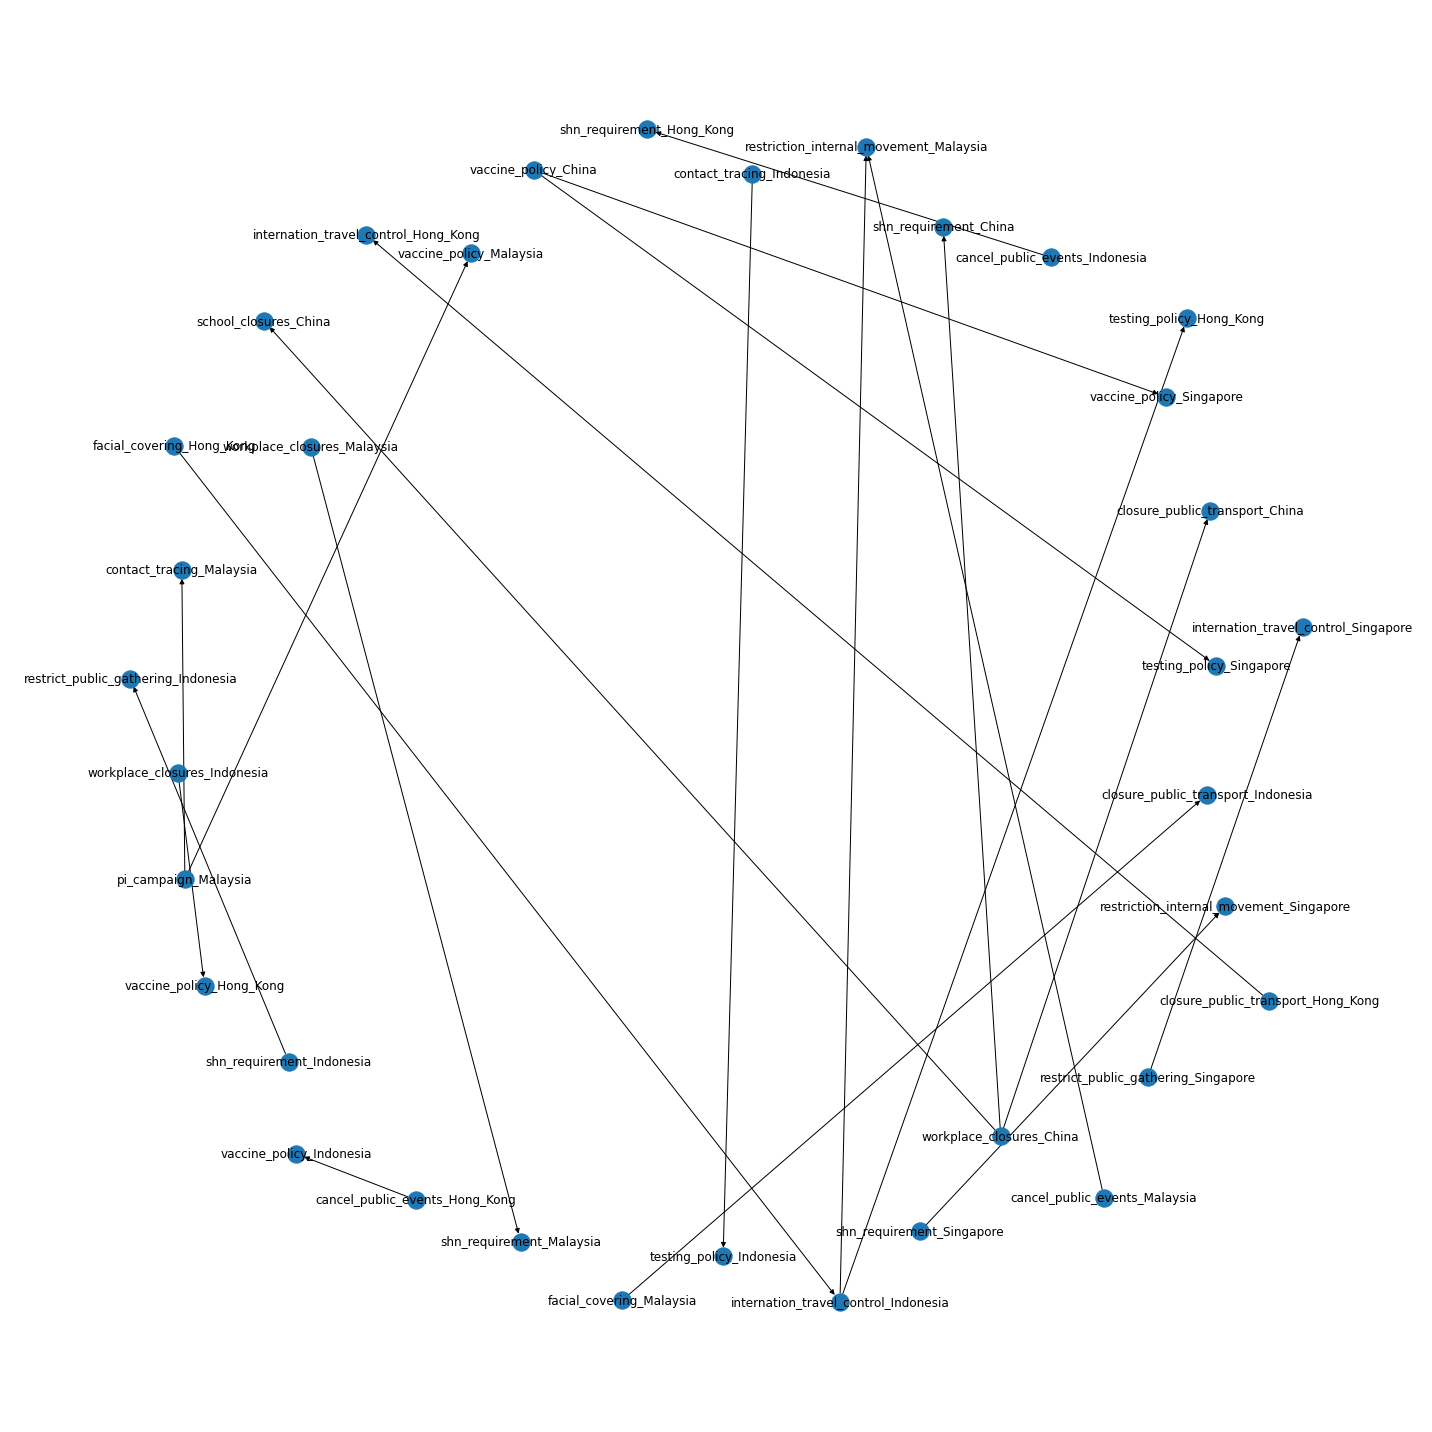

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20,20))
nx.draw(estimated_model, with_labels=True, ax=ax)
plt.tight_layout()

In [81]:
nodes_to_remove = list(set(shifted_new_df.columns) - set(estimated_model.nodes))

In [51]:
learnt_bn = BayesianNetwork(list(estimated_model.edges))

In [52]:
from pgmpy.estimators import MaximumLikelihoodEstimator
learnt_bn.fit(pd.concat([x_train, y_train], axis=1), MaximumLikelihoodEstimator)

In [53]:
for cpd in learnt_bn.get_cpds():
    print(cpd)

+-----+------------------------------+
| ... | facial_covering_Hong_Kong(3) |
+-----+------------------------------+
| ... | 0.0                          |
+-----+------------------------------+
| ... | 0.32                         |
+-----+------------------------------+
| ... | 0.46                         |
+-----+------------------------------+
| ... | 0.22                         |
+-----+------------------------------+
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
+-----------------------------+----------+
| workplace_closures_China(2) | 0.211499 |
+-----------------------------+----------+
| workplace_closures_China(3) | 0.788501 |
+-----------------------------+----------+
+-----------------------------------+-----+-----------------------------+
| workplace_closures_China          | ... | workplace_closures_China(3) |
+-----------------------------------+-----+---------------------

In [54]:
test_df = pd.concat([x_test, y_test], axis=1)

In [90]:
test_df[test_df["shn_requirement_Indonesia"] == 1][["shn_requirement_Indonesia", "restrict_public_gathering_Indonesia"]]

,shn_requirement_Indonesia,restrict_public_gathering_Indonesia
633,1,3
565,1,3
190,1,4
191,1,4
162,1,4
612,1,3
646,1,3
639,1,3
198,1,4
604,1,3


In [98]:
idx = test_df[test_df["shn_requirement_Indonesia"] == 1].index[0]
print(idx)

633


In [99]:
test_df.loc[idx]["restrict_public_gathering_Indonesia"]

3

In [100]:
# if idx = 190 output still gives higher prob to category 3 (instead of 4)
query_dict = test_df.loc[idx].to_dict()

In [101]:
query_dict.pop("restrict_public_gathering_Indonesia")

3

In [102]:
for node in nodes_to_remove:
  query_dict.pop(node)

In [103]:
from pgmpy.inference import VariableElimination

ve = VariableElimination(learnt_bn)

In [104]:
print(
    ve.query(
        ["restrict_public_gathering_Indonesia"], evidence=query_dict
    )
)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----------------------------------------+--------------------------------------------+
| restrict_public_gathering_Indonesia    |   phi(restrict_public_gathering_Indonesia) |
+========================================+============================================+
| restrict_public_gathering_Indonesia(3) |                                     0.6815 |
+----------------------------------------+--------------------------------------------+
| restrict_public_gathering_Indonesia(4) |                                     0.3185 |
+----------------------------------------+--------------------------------------------+
